In [379]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mpl
import seaborn as sb
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
import joblib as jl


# Загрузка данных

In [380]:
df = pd.read_csv('./data./telecom_churn.csv')
df.head()


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


# Предобработка

In [381]:
df.info(), df.shape, df.ndim

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

(None, (3333, 20), 2)

Приведение типов

In [382]:
df['Churn'] = df['Churn'].astype('int64')

Кодировка через словарь

In [383]:
df['Voice mail plan'].value_counts(),
df['International plan'].value_counts()

No     3010
Yes     323
Name: International plan, dtype: int64

Так как значений не много и они могут иметь большое зачение, то кодируем через словарь

In [384]:
yes_no_map = {
    "Yes": 1,
    "No": 0
}

df['International plan'] = df['International plan'].map(yes_no_map)
df['Voice mail plan'] = df['Voice mail plan'].map(yes_no_map)

In [385]:
df['State'].nunique()

51

Так как значений много, то кодируем через энкодер

In [386]:
df['State'] = LabelEncoder().fit_transform(df['State'])

# Нормализация

Просмотр статистики

In [387]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
State,3333.0,26.059406,14.824911,0.00,14.00,26.00,39.00,50.00
Account length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
Area code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
International plan,3333.0,0.096910,0.295879,0.00,0.00,0.00,0.00,1.00
Voice mail plan,3333.0,0.276628,0.447398,0.00,0.00,0.00,1.00,1.00
Number vmail messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
Total day minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
Total day calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
Total day charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
Total eve minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70


Так как у разных колонок имеется сильно отличающиеся друг от друга значения, то стоит их нормализовать

In [388]:
scal = StandardScaler()
df_scal = scal.fit_transform(df.drop('Churn', axis=1))
df_scal

array([[-0.6786493 ,  0.67648946, -0.52360328, ..., -0.60119509,
        -0.0856905 , -0.42793202],
       [ 0.6031696 ,  0.14906505, -0.52360328, ..., -0.60119509,
         1.2411686 , -0.42793202],
       [ 0.33331299,  0.9025285 , -0.52360328, ...,  0.21153386,
         0.69715637, -1.1882185 ],
       ...,
       [ 0.87302621, -1.83505538,  1.71881732, ...,  0.61789834,
         1.3871231 ,  0.33235445],
       [-1.35329082,  2.08295458,  1.71881732, ...,  2.24335625,
        -1.87695028,  0.33235445],
       [ 1.07541867, -0.67974475, -0.52360328, ..., -0.19483061,
         1.2411686 , -1.1882185 ]])

# Подготовка данных

<AxesSubplot:>

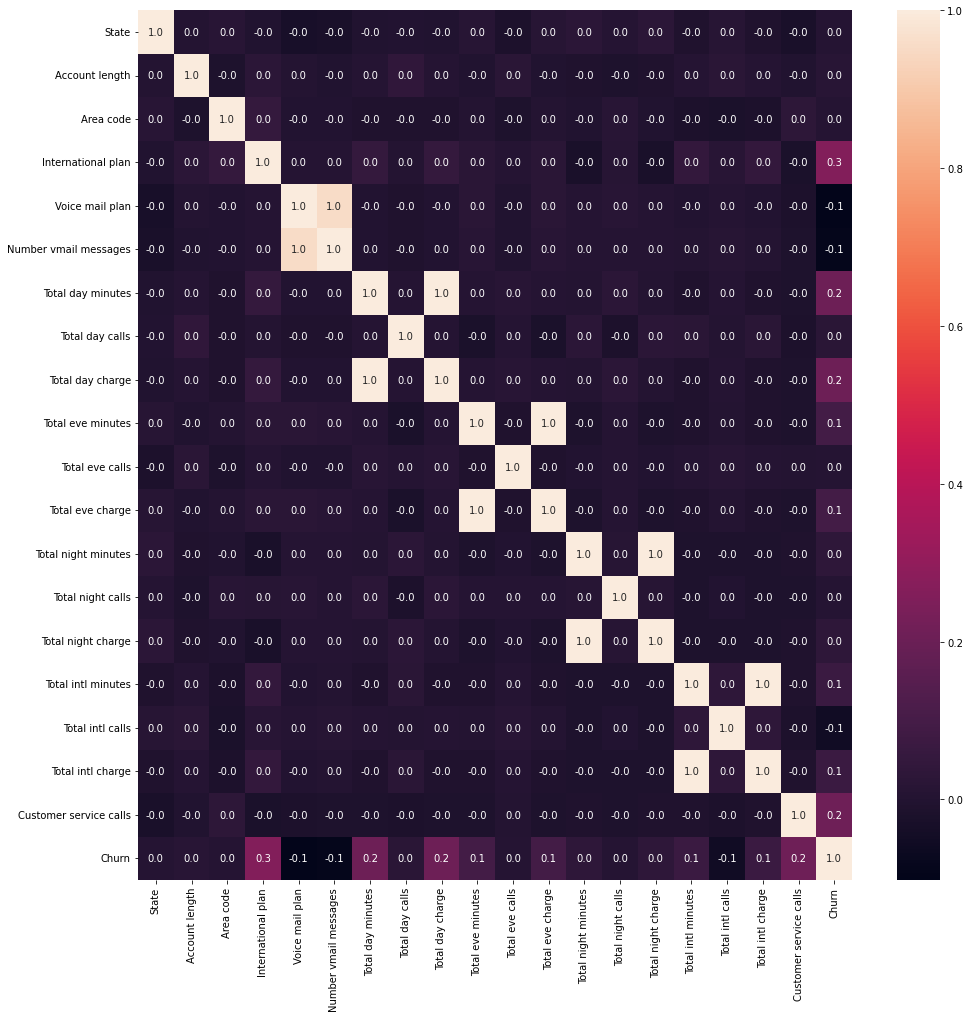

In [389]:
mpl.figure(figsize = (16, 16))
sb.heatmap(df.corr(), annot=True, fmt='.1f')

'Customer service calls', 'International plan', 'Total day minutes', 'Total day charge' злабовыраженно влияют на целефую переменную
Проанализаируем их дальше

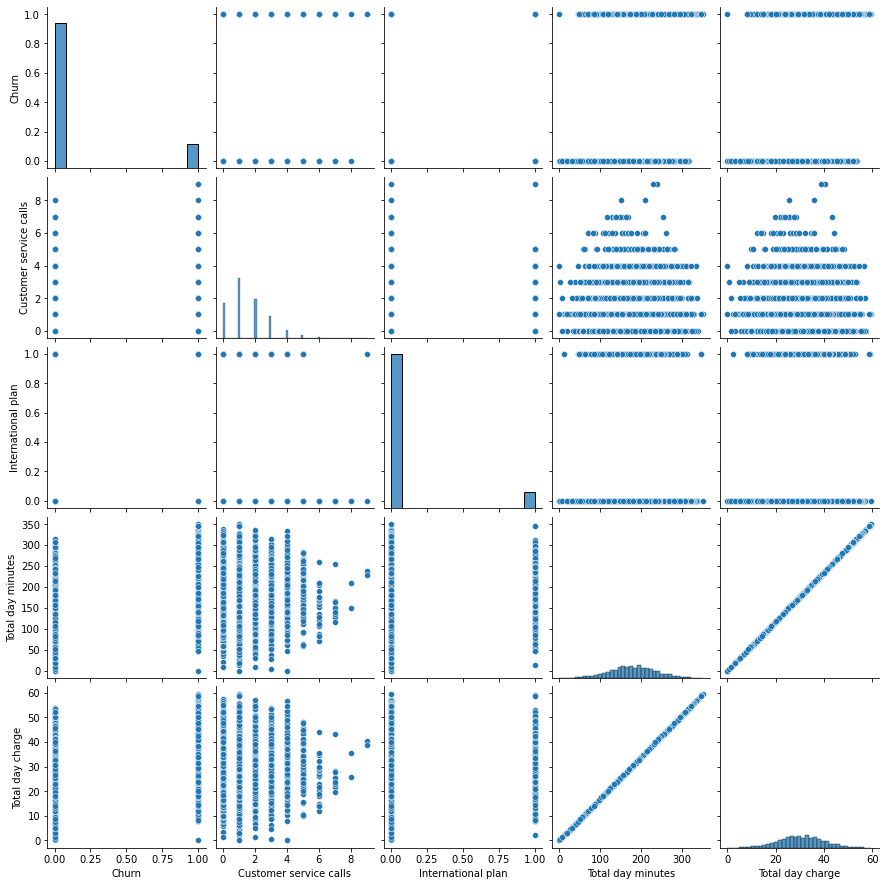

In [390]:
sb.pairplot(df[['Churn', 'Customer service calls', 'International plan', 'Total day minutes', 'Total day charge']])

Видна прямая взаимозависимость Total day minutes от Total day charge
По этому будет оставленна Total day minutes

По итогу, кроме целевой переменной, оставляем колонки 'Customer service calls', 'International plan', 'Total day minutes'

In [391]:
df = df[['Churn', 'Customer service calls', 'International plan', 'Total day minutes']]

# Разбиение данных на тестовую и тренеровочную выборку

In [392]:
x = df_scal.copy()
y = df['Churn']

In [393]:
y.value_counts()

0    2850
1     483
Name: Churn, dtype: int64

<AxesSubplot:>

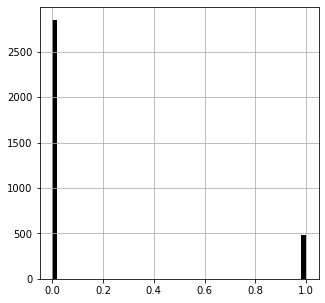

In [394]:
df['Churn'].hist(figsize=(5, 5), bins=50, color='black')

Так как количество не сбалансировано, то нужно, чтобы в обеих порциях были пропорциональное количество данных

In [395]:
x_train, x_test, y_train,y_test = train_test_split(x, y, test_size=0.3, random_state=1, stratify=y)

# Обучение модели

## Дерево решений

In [396]:
decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(x_train, y_train)

DecisionTreeClassifier()

Проверяем точность

In [397]:
decision_tree_classifier.score(x_test, y_test)

0.918

Делаем предсказание

In [398]:
y_predicted = decision_tree_classifier.predict(x_test)
accuracy_score(y_test, y_predicted)

0.918

In [399]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       855
           1       0.72      0.72      0.72       145

    accuracy                           0.92      1000
   macro avg       0.83      0.83      0.83      1000
weighted avg       0.92      0.92      0.92      1000



Матрицы точности

<AxesSubplot:>

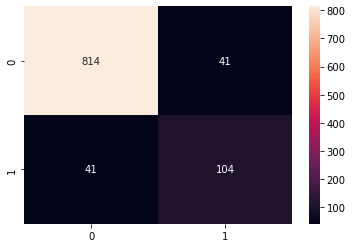

In [400]:
sb.heatmap(confusion_matrix(y_test, y_predicted), annot=True, fmt='.0f')

# Настройка гиперпараметров в моделе

In [401]:
decision_tree_classifier = DecisionTreeClassifier(random_state=1)

In [402]:
params = {
    "max_depth": np.arange(1,7,1),
    "min_samples_leaf": range(1, 6, 1)
}
grid = GridSearchCV(decision_tree_classifier, params, cv=5, n_jobs=-1)

Обучение на кросс валидации

In [403]:
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_depth': array([1, 2, 3, 4, 5, 6]),
                         'min_samples_leaf': range(1, 6)})

In [404]:
print(grid.best_params_)

best_decision_tree_classifier = grid.best_estimator_

{'max_depth': 6, 'min_samples_leaf': 1}


0.94
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       855
           1       0.89      0.67      0.76       145

    accuracy                           0.94      1000
   macro avg       0.92      0.83      0.86      1000
weighted avg       0.94      0.94      0.94      1000



<AxesSubplot:>

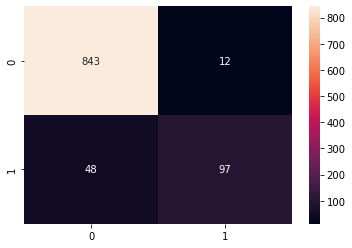

In [405]:
y_predicted = best_decision_tree_classifier.predict(x_test)

print(accuracy_score(y_test, y_predicted))
print(classification_report(y_test, y_predicted))

sb.heatmap(confusion_matrix(y_test, y_predicted), annot=True, fmt='.0f')

## Метод к-ближайших соседей

In [406]:
np.random.seed(1)
k_neighbors_classifier = KNeighborsClassifier(n_neighbors=13)

In [407]:
k_neighbors_classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=13)

In [408]:
y_predicted = k_neighbors_classifier.predict(x_test)
accuracy_score(y_test, y_predicted)

0.881

In [409]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93       855
           1       0.88      0.21      0.34       145

    accuracy                           0.88      1000
   macro avg       0.88      0.60      0.63      1000
weighted avg       0.88      0.88      0.85      1000



In [410]:

k_neighbors_classifier = KNeighborsClassifier()
params = {
    "n_neighbors": np.arange(1,18,1),
    "leaf_size": range(1, 6, 1)
}
grid = GridSearchCV(k_neighbors_classifier, params, cv=5, n_jobs=-1)
grid.estimator.get_params().keys()
grid.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'leaf_size': range(1, 6),
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])})

In [411]:
best_k_neighbors_classifier:KNeighborsClassifier = grid.best_estimator_
y_predicted = best_k_neighbors_classifier.predict(x_test)
accuracy_score(y_test, y_predicted)
print(classification_report(y_test, y_predicted))


              precision    recall  f1-score   support

           0       0.90      0.98      0.94       855
           1       0.77      0.39      0.52       145

    accuracy                           0.90      1000
   macro avg       0.84      0.69      0.73      1000
weighted avg       0.89      0.90      0.88      1000



<AxesSubplot:>

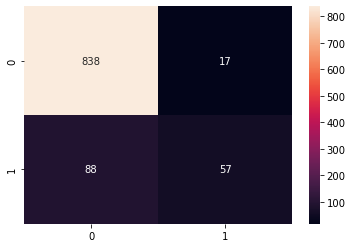

In [412]:
sb.heatmap(confusion_matrix(y_test, y_predicted), annot=True, fmt='.0f')


## Случайный лес

In [413]:
random_forest = RandomForestClassifier(n_estimators=300, random_state=1)
random_forest.fit(x_train, y_train)

RandomForestClassifier(n_estimators=300, random_state=1)

In [414]:
y_predicted = random_forest.predict(x_test)

In [415]:
accuracy_score(y_test, y_predicted)

0.95

In [416]:
random_forest = RandomForestClassifier()
params = {
    "n_estimators": np.arange(200,400,10),
}
grid = GridSearchCV(random_forest, params, cv=5, n_jobs=-1)
grid.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'n_estimators': array([200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320,
       330, 340, 350, 360, 370, 380, 390])})

In [417]:
best_random_forest = grid.best_estimator_
y_predicted = best_random_forest.predict(x_test)
print(classification_report(y_test, y_predicted), grid.best_params_)
accuracy_score(y_test, y_predicted)


              precision    recall  f1-score   support

           0       0.95      1.00      0.97       855
           1       0.96      0.68      0.80       145

    accuracy                           0.95      1000
   macro avg       0.95      0.84      0.88      1000
weighted avg       0.95      0.95      0.95      1000
 {'n_estimators': 280}


0.95

## Логическая регрессия

In [418]:
logistic_regression = LogisticRegression(random_state=1, C = 5.0, n_jobs=-1)

In [419]:
logistic_regression.fit(x_train, y_train)

LogisticRegression(C=5.0, n_jobs=-1, random_state=1)

In [420]:
logistic_regression.score(x_test, y_test)

0.854

In [421]:
y_predicted = logistic_regression.predict(x_test)


In [422]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       855
           1       0.49      0.19      0.28       145

    accuracy                           0.85      1000
   macro avg       0.68      0.58      0.60      1000
weighted avg       0.82      0.85      0.83      1000



## SGD

In [423]:
sgd_classifier = SGDClassifier(random_state=1, epsilon=0.01)

In [424]:
sgd_classifier.fit(x_train, y_train)

SGDClassifier(epsilon=0.01, random_state=1)

In [425]:
y_predicted = sgd_classifier.predict(x_test)

In [426]:
accuracy_score(y_test, y_predicted)

0.826

In [427]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90       855
           1       0.35      0.24      0.29       145

    accuracy                           0.83      1000
   macro avg       0.62      0.58      0.59      1000
weighted avg       0.80      0.83      0.81      1000



# Сохранение модели в файл

In [428]:
jl.dump(random_forest, './models/random_forest_telecom.pkl')

['./models/random_forest_telecom.pkl']

# Сохранение предсказания в файл

In [429]:
y_predicted_series = pd.Series(y_predicted, name='Predicted_Churn')
y_predicted_series.to_csv("./predications/predications_telecom.csv")